### Thomson Samplig:
Be greedy, but sampling from the posterior, rather than from an upper-bound.
Less effective bandits will be selected less often.



The probability density function (PDF) of the Beta distribution is given by:

$ f(x|\alpha, \beta) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)} $

where $B(\alpha, \beta)$ is the Beta function that acts as a normalization constant.

When you update the Beta distribution with new data points (successes and failures), you are performing Bayesian inference. The conjugate update formula ensures that the updated distribution remains a Beta distribution. Here's how the update formula works in terms of the conjugates:

1. **Prior Distribution:**
   - Prior distribution: $ f(x|\alpha, \beta) $
   - Here, $\alpha$ represents the number of prior successes, and $\beta$ represents the number of prior failures.

2. **Likelihood Function (Bernoulli):**
   - Likelihood function: $ P(X=x|\theta) = \theta^x (1 - \theta)^{1 - x} $
   - $ x $ is the observed data point (0 or 1), and $\theta$ is the parameter representing the probability of success.

3. **Posterior Distribution:**
   - Using Bayes' theorem, the posterior distribution is proportional to the product of the prior and the likelihood.
   - Posterior $\propto$ Likelihood $\times$ Prior
   - After normalization, the posterior becomes another Beta distribution:
     $ f(x|\text{updated }\alpha, \text{updated }\beta) \propto x^{\text{updated }\alpha - 1} (1 - x)^{\text{updated }\beta - 1} $
     
   - Using the conjugate update formula, after observing \( x \) (0 or 1):
     - For successes $x = 1$: Increase $\alpha$ by 1.
     - For failures $x = 0$: Increase $\beta$ by 1.

This update process ensures that the updated distribution, given the prior and new data, is still a Beta distribution with updated parameters $\alpha$ and $\beta$. The Beta function $B(\alpha, \beta)$ ensures proper normalization, making the area under the PDF equal to 1.

In summary, the conjugate update formula maintains the form of the distribution, allowing you to sequentially update your beliefs as new data becomes available, which is a fundamental concept in Bayesian statistics.

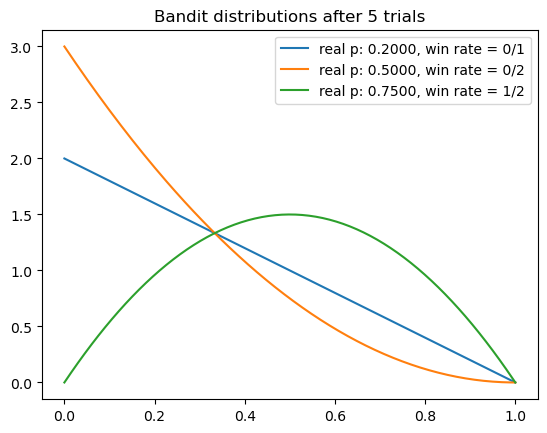

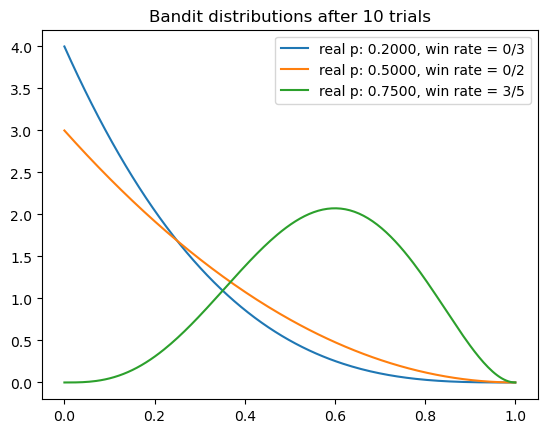

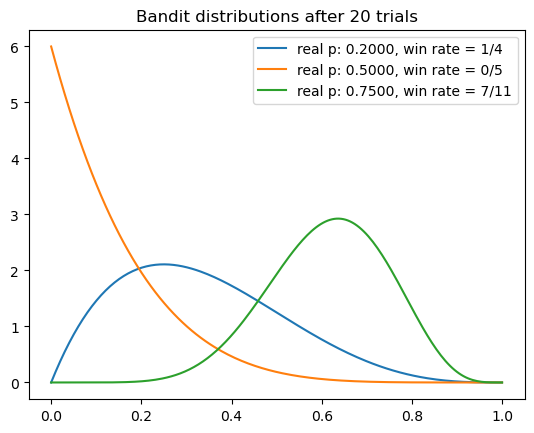

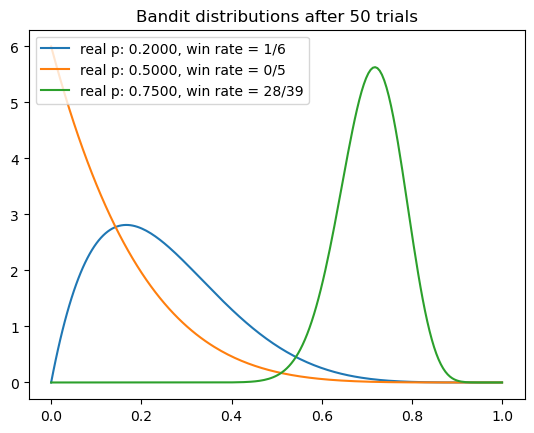

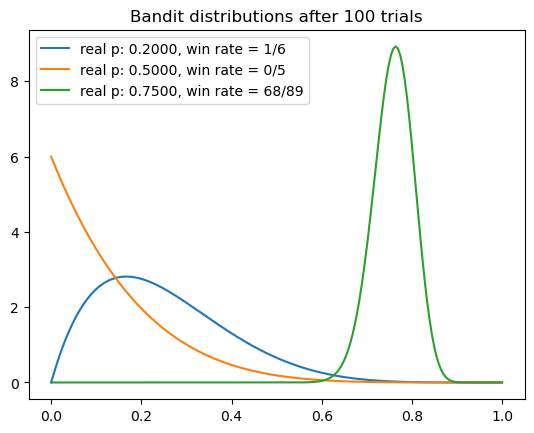

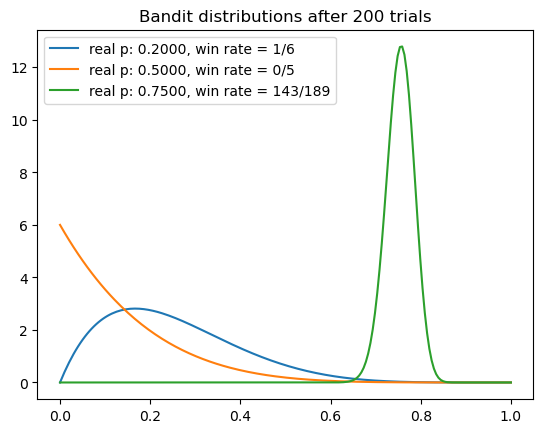

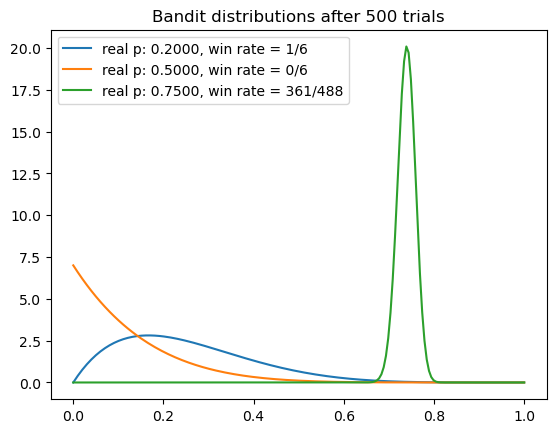

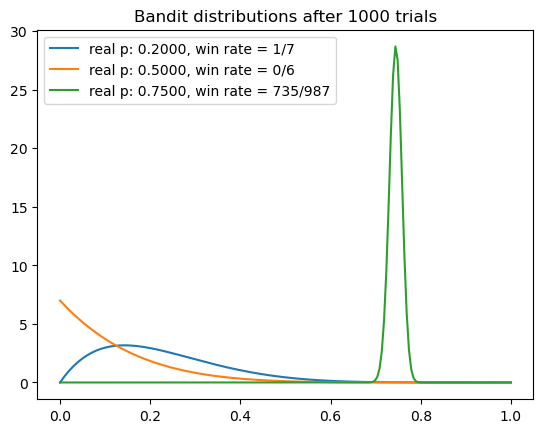

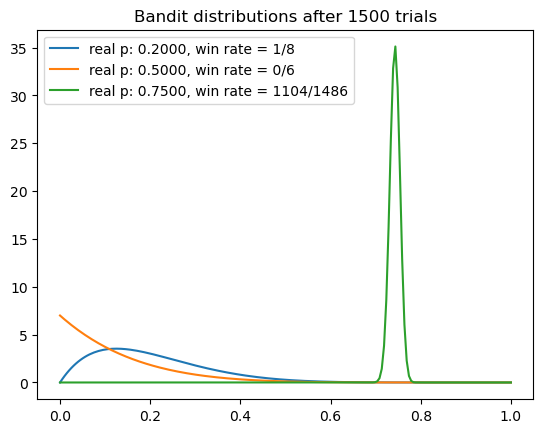

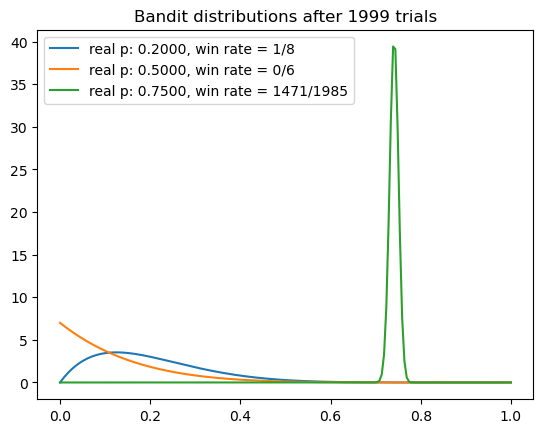

total reward earned: 1472.0
overall win rate: 0.736
num times selected each bandit: [8, 6, 1986]


In [12]:
from __future__ import print_function, division
from builtins import range

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta


# np.random.seed(2)
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1 # TODO, since B(1,1)= Uniform(0,1). And U(0,1) means no prior information
        self.b = 1 # TODO
        self.N = 0 # for information only

    def pull(self):
        return np.random.random() < self.p

    def sample(self):
        # TODO - draw a sample from Beta(a, b)
        return np.random.beta(self.a,self.b) # return stats.beta.rvs(alpha, beta, size=1) 

    def update(self, x):
        self.a = self.a + x  # If X= 1, add +1 to alpha
        self.b = self.b + (1 - x) # If X= 0, add +1 to beta
        self.N += 1


def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}")
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()


def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        # Thompson sampling
        j = np.argmax([b.sample() for b in bandits]) # TODO

        # plot the posteriors
        if i in sample_points:
            plot(bandits, i)

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])


if __name__ == "__main__":
    experiment()
